In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
categorical_features = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df_encoded = df_encoded.astype(int)

In [4]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## PCA

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Explained varience ratio: ", pca.explained_variance_ratio_)

Explained varience ratio:  [0.22449803 0.11023286]


The explained variance ratio indicates that this 2D PCA projection captures approximately one-third of the dataset's total variance. 

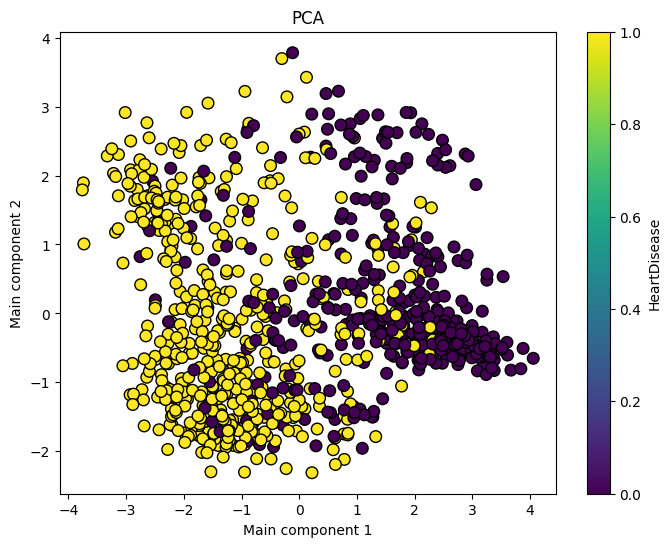

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', edgecolor='k', s=70)
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.title('PCA')
plt.colorbar(label='HeartDisease')
plt.show()

 The significant overlap between the yellow (no disease) and purple (disease) clusters suggests that these two components, which explain only about 33.5% of the total variance, are insufficient to clearly separate the two classes.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': ['scale', 'auto', 0.01, 0.1, 1], 
    'kernel': ['rbf', 'linear']
}

In [11]:
grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [12]:
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", svm_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8586956521739131

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        82
           1       0.88      0.86      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.8478260869565217
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        82
           1       0.89      0.83      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



## t-SNE

In [15]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

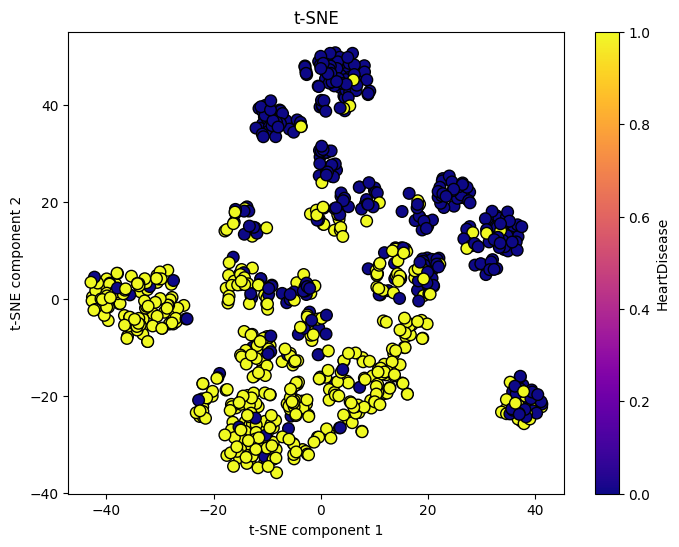

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='plasma', edgecolor='k', s=70)
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('t-SNE')
plt.colorbar(label='HeartDisease')
plt.show()

The t-SNE plot reveals that the Heart Disease data has a complex structure with distinct subgroups. While t-SNE successfully separates some of these subgroups by class, the overall mixing in the central areas confirms the difficulty of binary classification on this dataset.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': ['scale', 'auto', 0.01, 0.1, 1], 
    'kernel': ['rbf', 'linear']
}

In [19]:
grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [20]:
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", svm_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8858695652173914

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



In [21]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.8804347826086957
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        82
           1       0.88      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

